In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv(r'/content/sample_data/ObesityDataSet_raw_and_data_sinthetic.csv')

# eda

In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data = data.rename(columns={'family_history_with_overweight': 'FHWO',
                           'NObeyesdad' : 'BMI',})

In [5]:
data.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2111 non-null   object 
 1   Age     2111 non-null   float64
 2   Height  2111 non-null   float64
 3   Weight  2111 non-null   float64
 4   FHWO    2111 non-null   object 
 5   FAVC    2111 non-null   object 
 6   FCVC    2111 non-null   float64
 7   NCP     2111 non-null   float64
 8   CAEC    2111 non-null   object 
 9   SMOKE   2111 non-null   object 
 10  CH2O    2111 non-null   float64
 11  SCC     2111 non-null   object 
 12  FAF     2111 non-null   float64
 13  TUE     2111 non-null   float64
 14  CALC    2111 non-null   object 
 15  MTRANS  2111 non-null   object 
 16  BMI     2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


In [7]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
col = data.columns
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI'],
      dtype='object')

# Unique Value Atribute

In [9]:
object_cols = [col for col in data.columns if data[col].dtype == "object"]

good_label_cols = [col for col in object_cols if set(data[col]).issubset(set(data[col]))]
good_label_cols.remove('BMI')

print('Categorical columns that will be ordinal encoded:', good_label_cols)

Categorical columns that will be ordinal encoded: ['Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [10]:
printf = 'Value Unique {}:\n {} \n'

for count, i in enumerate(object_cols):
    val_count = data['{}'.format(i)].value_counts()
    print(count, printf.format(i, val_count))

0 Value Unique Gender:
 Male      1068
Female    1043
Name: Gender, dtype: int64 

1 Value Unique FHWO:
 yes    1726
no      385
Name: FHWO, dtype: int64 

2 Value Unique FAVC:
 yes    1866
no      245
Name: FAVC, dtype: int64 

3 Value Unique CAEC:
 Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64 

4 Value Unique SMOKE:
 no     2067
yes      44
Name: SMOKE, dtype: int64 

5 Value Unique SCC:
 no     2015
yes      96
Name: SCC, dtype: int64 

6 Value Unique CALC:
 Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64 

7 Value Unique MTRANS:
 Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64 

8 Value Unique BMI:
 Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight   

In [11]:
col_isna = data.isnull().sum().to_list()
for count, i in enumerate(col_isna):
    print(count, '{:15}'.format(col[count]), i)

0 Gender          0
1 Age             0
2 Height          0
3 Weight          0
4 FHWO            0
5 FAVC            0
6 FCVC            0
7 NCP             0
8 CAEC            0
9 SMOKE           0
10 CH2O            0
11 SCC             0
12 FAF             0
13 TUE             0
14 CALC            0
15 MTRANS          0
16 BMI             0


# Transformation¶

In [12]:
data_transform = data.copy()
ordinal_encoder = OrdinalEncoder()
data_transform[good_label_cols] = ordinal_encoder.fit_transform(data_transform[good_label_cols])

In [13]:
dic_to_replace = {"BMI": {"Insufficient_Weight": 0, 
                          "Normal_Weight": 1,
                         'Overweight_Level_I': 2,
                          'Overweight_Level_II': 3,
                          'Obesity_Type_I': 4,
                          'Obesity_Type_II': 5,
                          'Obesity_Type_III': 6,}
                         }
data_transform.replace(dic_to_replace, inplace=True)

In [14]:
data_transform

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,3.0,1
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,3.0,1
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,3.0,1
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,4.0,2
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,3.0,6
2107,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,3.0,6
2108,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,3.0,6
2109,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,3.0,6


In [15]:
data_transform.describe()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


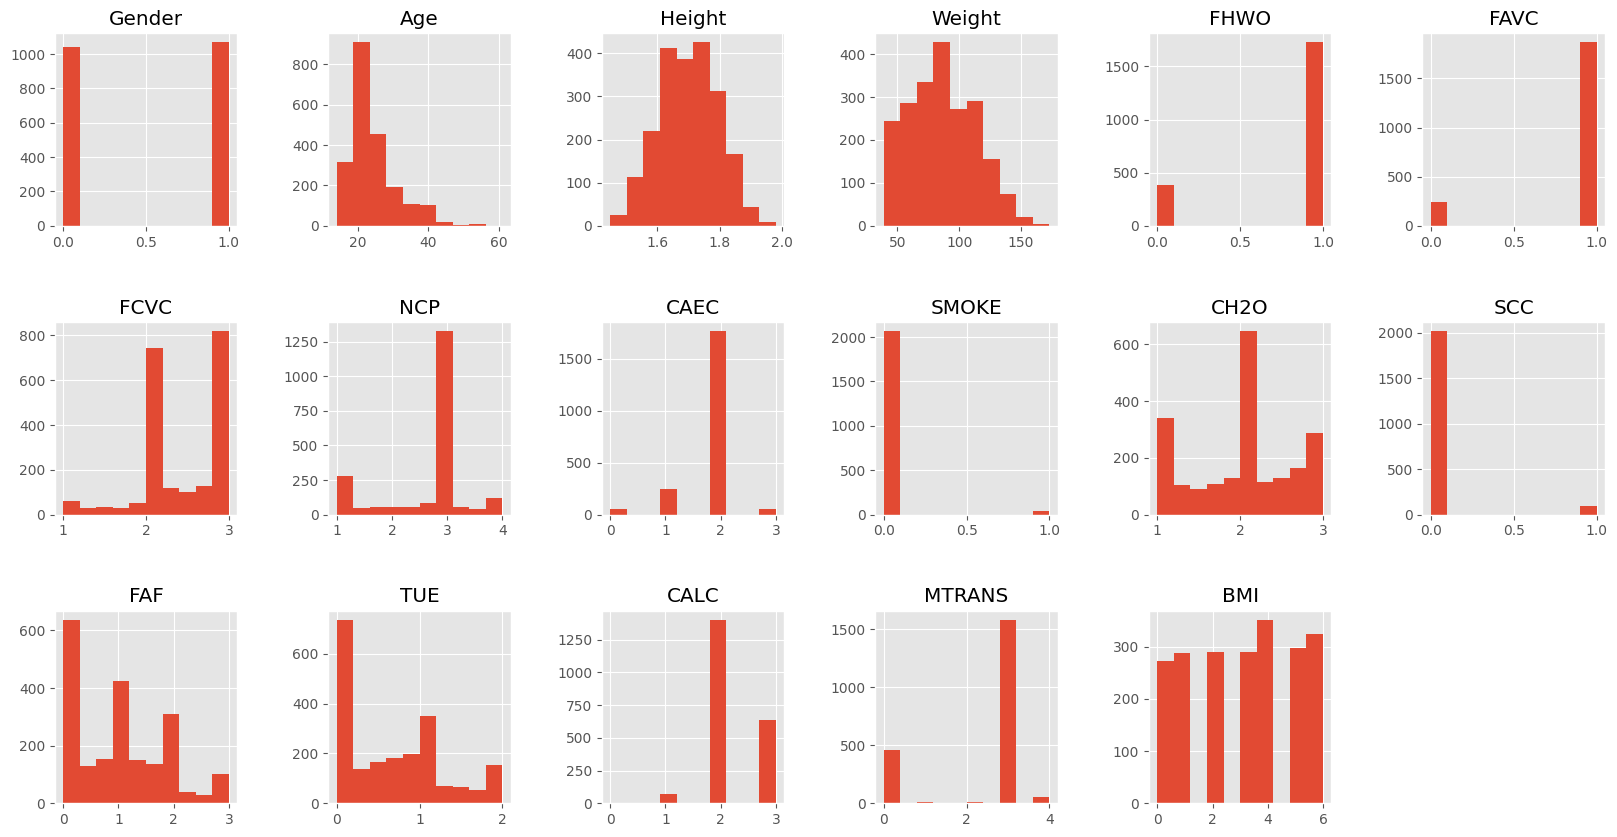

In [16]:
import math
import matplotlib.pyplot as plt

# Menghitung jumlah baris dan kolom yang dibutuhkan
n_cols = len(data_transform.columns)
n_rows = math.ceil(n_cols/6)

# Mengatur ukuran figure
fig, axes = plt.subplots(nrows=n_rows, ncols=6, figsize=(20, 10))

# Mengatur jarak antar subplot
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Menampilkan histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < n_cols:
        ax.hist(data_transform.iloc[:, i], bins=10)
        ax.set_title(data_transform.columns[i])
    else:
        fig.delaxes(ax) # Menghapus subplot yang tersisa

# Menampilkan grafik
plt.show()

<Axes: xlabel='FAVC', ylabel='count'>

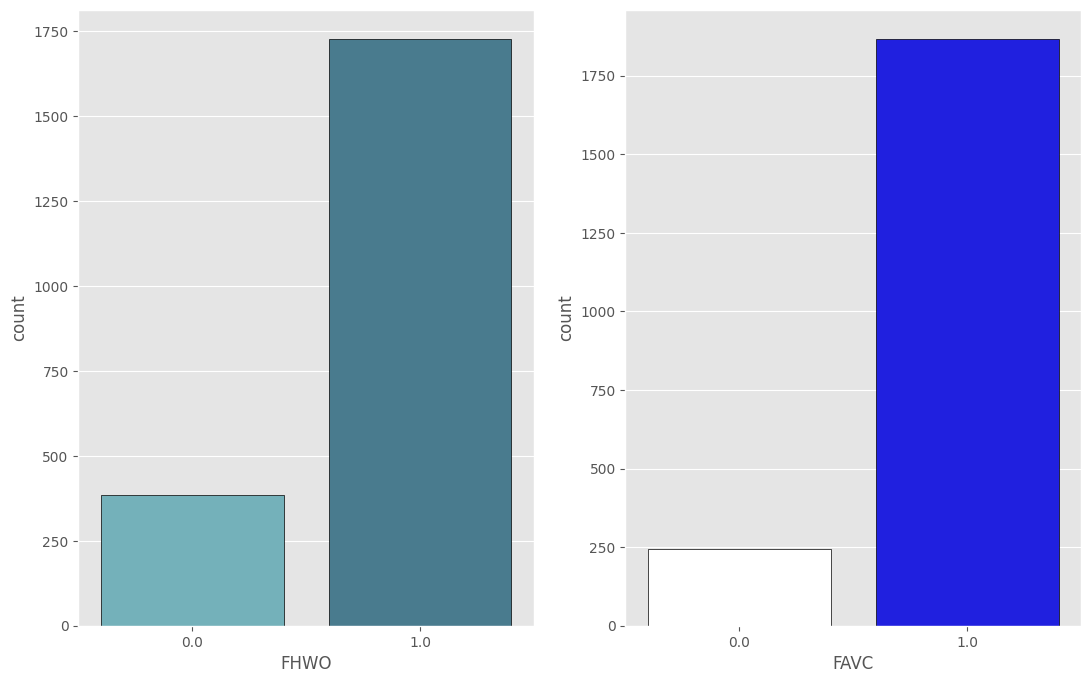

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.countplot(x= 'FHWO', data = data_transform, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'FAVC', data = data_transform, palette="flag",edgecolor="black")

<Axes: xlabel='SMOKE', ylabel='count'>

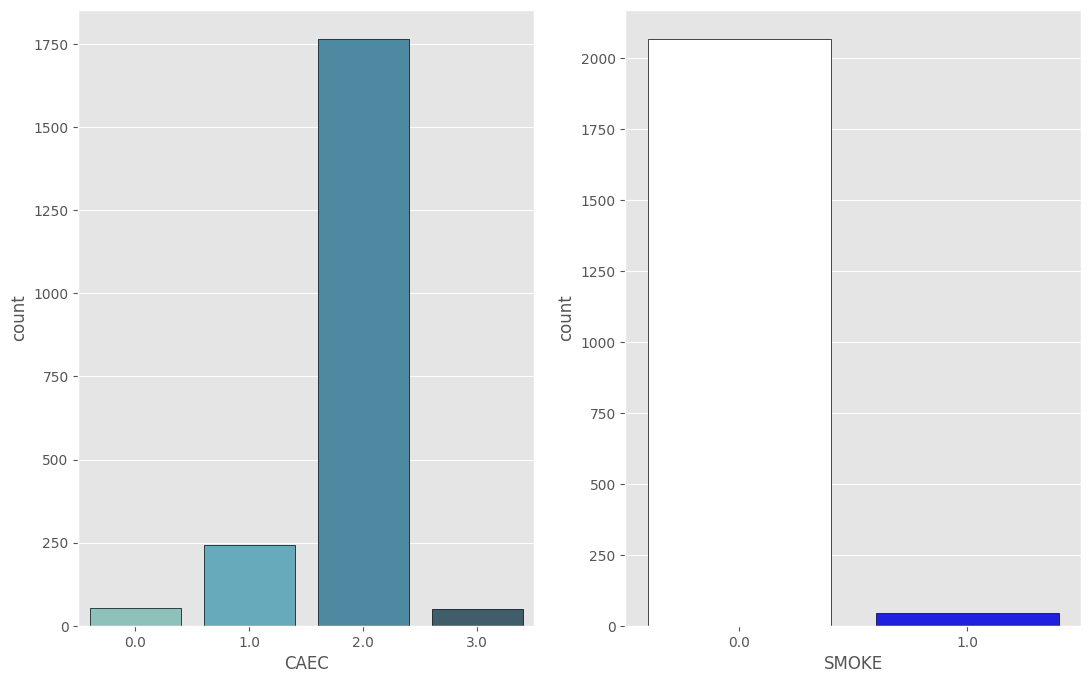

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.countplot(x= 'CAEC', data = data_transform, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'SMOKE', data = data_transform, palette="flag",edgecolor="black")

<Axes: xlabel='MTRANS', ylabel='count'>

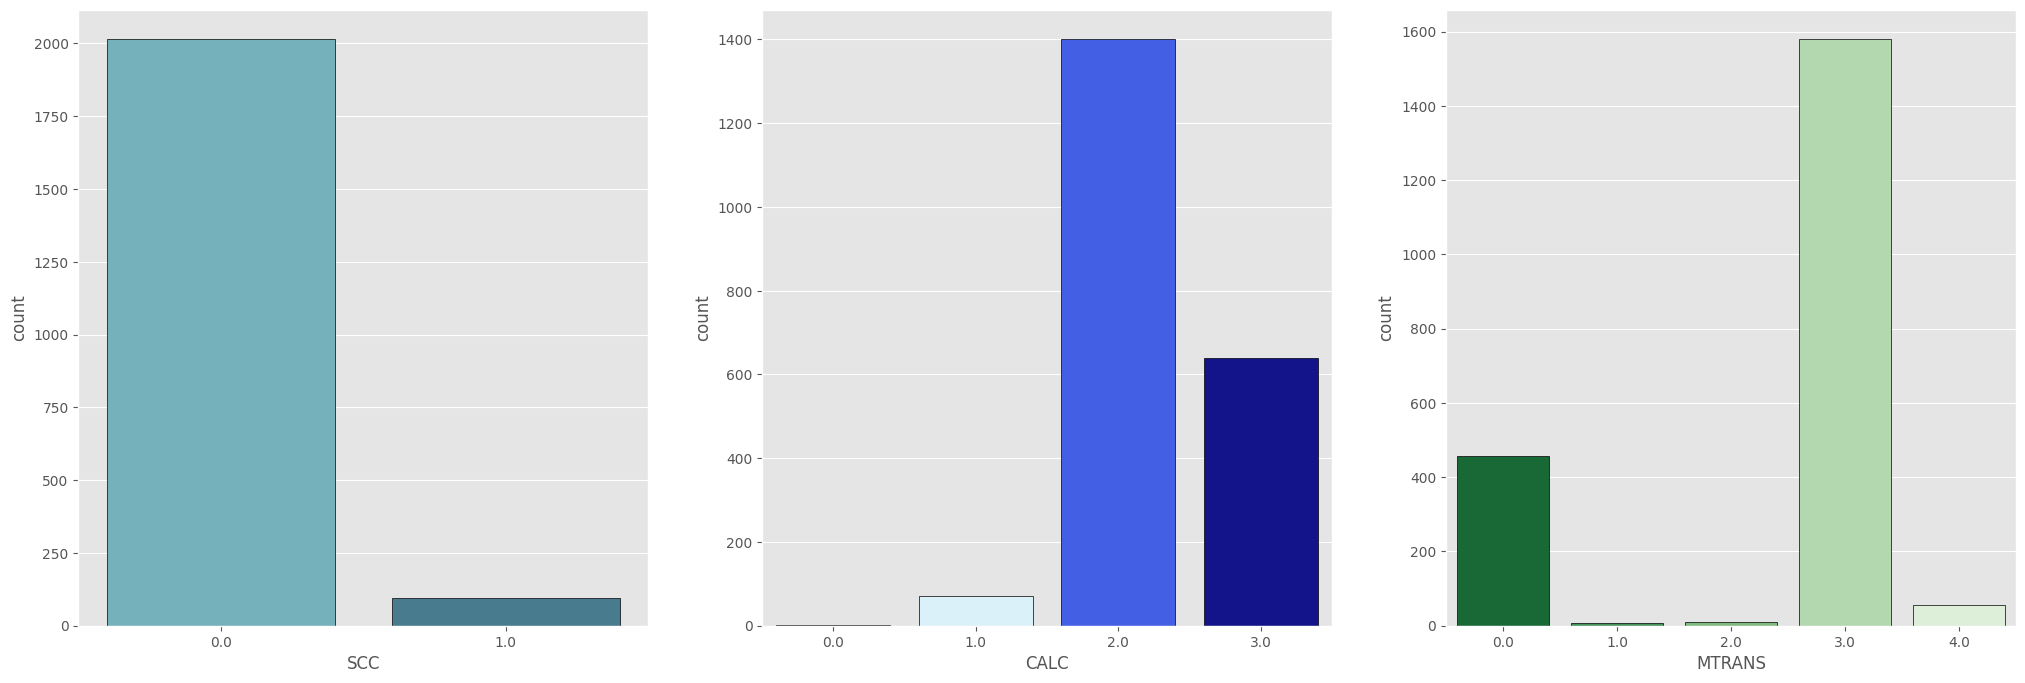

In [19]:
plt.figure(figsize=(25,8))
plt.subplot(131)
sns.countplot(x= 'SCC', data = data_transform, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'CALC', data = data_transform, palette="flag",edgecolor="black")
plt.subplot(133)
sns.countplot(x= 'MTRANS', data = data_transform, palette="Greens_r",edgecolor="black")

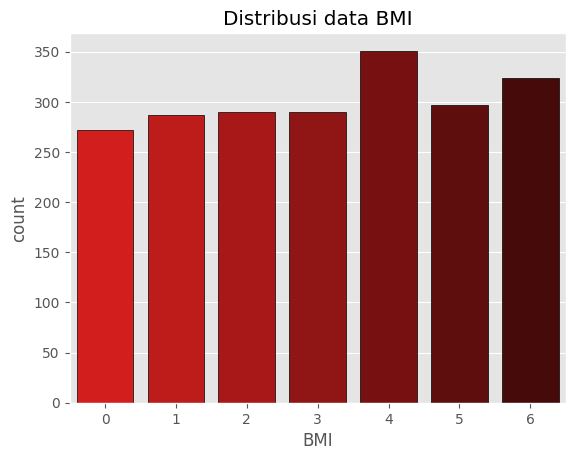

In [20]:
ax = sns.countplot(x = "BMI",data=data_transform, palette="flag",edgecolor="black")
plt.title('Distribusi data BMI')
sns.set(font_scale=1)

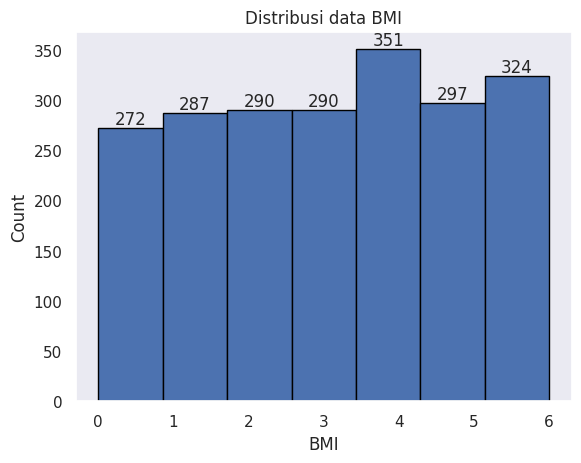

In [21]:
counts, edges, bars = plt.hist(data_transform['BMI'],edgecolor='black',bins=7)
plt.bar_label(bars)
plt.ylabel('Count')
plt.xlabel('BMI')
plt.title('Distribusi data BMI')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Distribusi data')

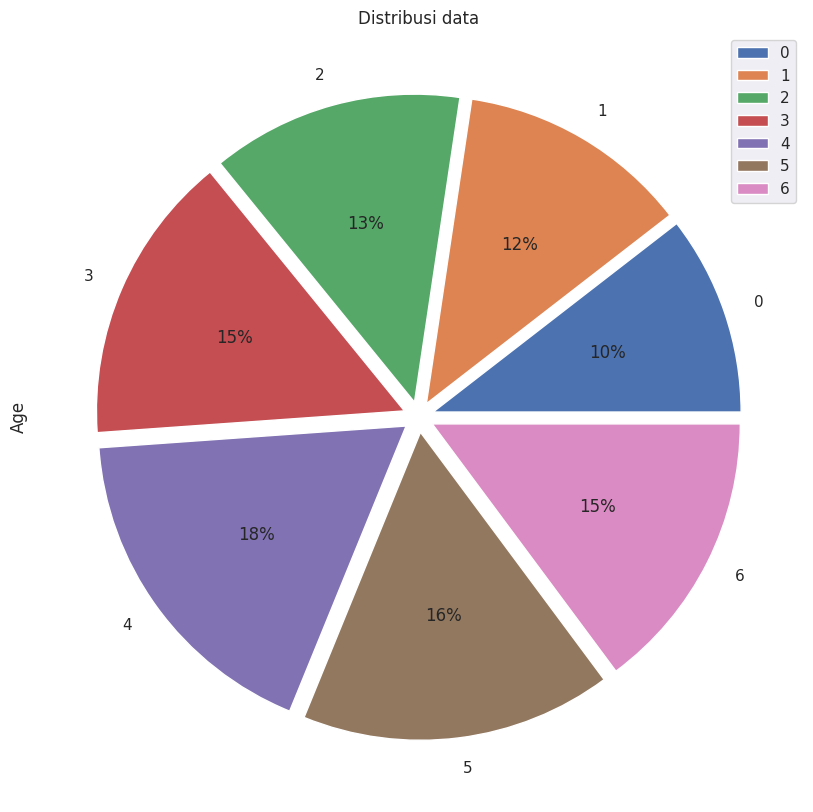

In [22]:
data_pie = data_transform.groupby(['BMI']).sum()
data_pie.plot(kind='pie', y='Age', 
              autopct='%1.0f%%', explode=[0.05]*7, 
              figsize=(10,10))
plt.legend(loc='upper right')
plt.title('Distribusi data')

In [23]:
corr = data_transform.corr()

<Axes: >

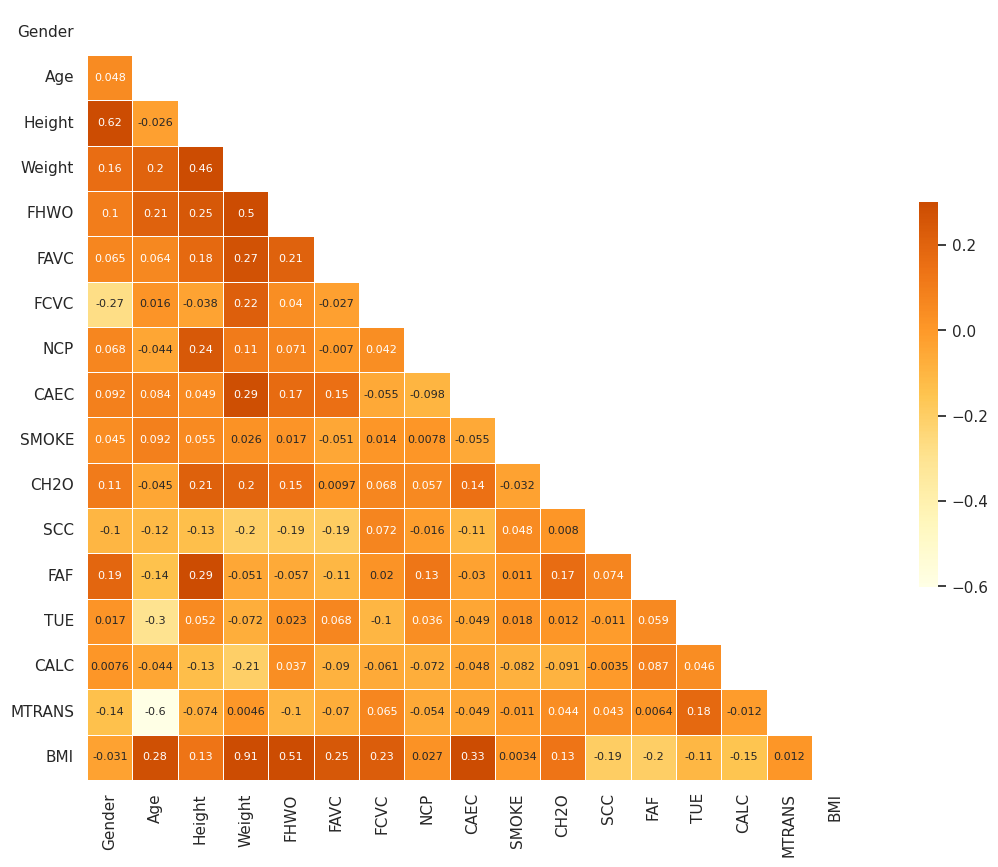

In [24]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(16, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot = True, annot_kws={"size": 8})

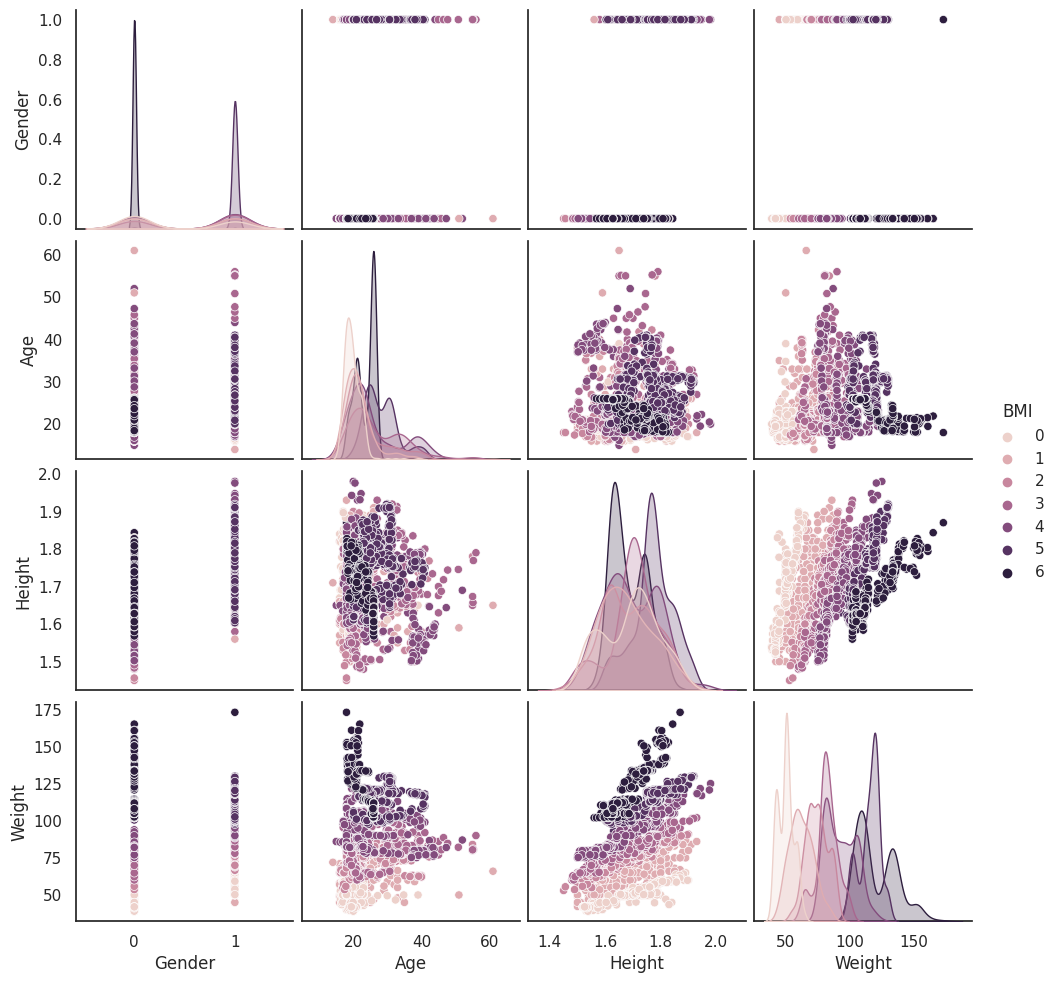

In [25]:
sns.pairplot(data_transform, 
             hue ='BMI', 
             vars = ['Gender','Age', 
                     'Height', 'Weight'])

# Train and Test split

In [26]:
data_input = data.copy()
data_input = data_input.drop(["Gender",'NCP','SMOKE','MTRANS'],axis=1)

In [27]:
good_label_cols

['Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

In [28]:
good_label_cols.remove('Gender')
good_label_cols.remove('SMOKE')
good_label_cols.remove('MTRANS')


In [29]:
data_input

,Age,Height,Weight,FHWO,FAVC,FCVC,CAEC,CH2O,SCC,FAF,TUE,CALC,BMI
0,21.000000,1.620000,64.000000,yes,no,2.0,Sometimes,2.000000,no,0.000000,1.000000,no,Normal_Weight
1,21.000000,1.520000,56.000000,yes,no,3.0,Sometimes,3.000000,yes,3.000000,0.000000,Sometimes,Normal_Weight
2,23.000000,1.800000,77.000000,yes,no,2.0,Sometimes,2.000000,no,2.000000,1.000000,Frequently,Normal_Weight
3,27.000000,1.800000,87.000000,no,no,3.0,Sometimes,2.000000,no,2.000000,0.000000,Frequently,Overweight_Level_I
4,22.000000,1.780000,89.800000,no,no,2.0,Sometimes,2.000000,no,0.000000,0.000000,Sometimes,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,yes,yes,3.0,Sometimes,1.728139,no,1.676269,0.906247,Sometimes,Obesity_Type_III
2107,21.982942,1.748584,133.742943,yes,yes,3.0,Sometimes,2.005130,no,1.341390,0.599270,Sometimes,Obesity_Type_III
2108,22.524036,1.752206,133.689352,yes,yes,3.0,Sometimes,2.054193,no,1.414209,0.646288,Sometimes,Obesity_Type_III
2109,24.361936,1.739450,133.346641,yes,yes,3.0,Sometimes,2.852339,no,1.139107,0.586035,Sometimes,Obesity_Type_III


[Text(0, 0, 'Normal_Weight'),
 Text(1, 0, 'Overweight_Level_I'),
 Text(2, 0, 'Overweight_Level_II'),
 Text(3, 0, 'Obesity_Type_I'),
 Text(4, 0, 'Insufficient_Weight'),
 Text(5, 0, 'Obesity_Type_II'),
 Text(6, 0, 'Obesity_Type_III')]

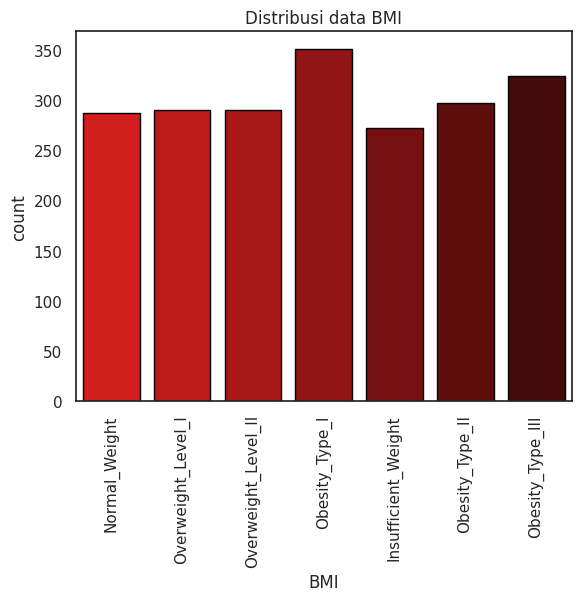

In [30]:
ax = sns.countplot(x = "BMI",data=data_input, palette="flag",edgecolor="black")
plt.title('Distribusi data BMI')
sns.set(font_scale=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [31]:
data_grouped_by = data_input.groupby(['BMI'])
data_balanced = data_grouped_by.apply(lambda x: x.sample(data_grouped_by.size().min()).reset_index(drop=True))
data_bal = data_balanced.droplevel(['BMI'])
data_bal

,Age,Height,Weight,FHWO,FAVC,FCVC,CAEC,CH2O,SCC,FAF,TUE,CALC,BMI
0,21.243142,1.598019,44.845655,no,no,3.000000,Frequently,2.444125,no,1.318170,0.000000,no,Insufficient_Weight
1,18.000000,1.706530,51.121749,yes,yes,2.000000,Sometimes,2.000000,no,0.000000,1.329237,Sometimes,Insufficient_Weight
2,18.871794,1.586895,41.452385,no,yes,2.000000,Sometimes,1.000000,no,0.194745,1.547086,Sometimes,Insufficient_Weight
3,23.000000,1.728834,51.442293,yes,yes,2.000000,Frequently,1.229915,no,0.619533,2.000000,no,Insufficient_Weight
4,18.000000,1.701650,50.157707,yes,yes,1.757466,Sometimes,1.153559,no,0.833976,1.616045,Sometimes,Insufficient_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,25.632447,1.836943,96.192662,yes,yes,1.317729,Sometimes,2.000000,no,1.806740,1.939770,Sometimes,Overweight_Level_II
268,28.770852,1.532897,65.031879,yes,no,2.000000,Sometimes,1.000000,no,0.262171,0.000000,no,Overweight_Level_II
269,33.015258,1.731960,84.315608,yes,yes,2.000000,Sometimes,2.205911,no,1.293396,0.000000,no,Overweight_Level_II
270,38.464538,1.696423,78.967919,yes,yes,3.000000,Sometimes,2.981604,no,0.000000,0.000000,no,Overweight_Level_II


[Text(0, 0, 'Insufficient_Weight'),
 Text(1, 0, 'Normal_Weight'),
 Text(2, 0, 'Obesity_Type_I'),
 Text(3, 0, 'Obesity_Type_II'),
 Text(4, 0, 'Obesity_Type_III'),
 Text(5, 0, 'Overweight_Level_I'),
 Text(6, 0, 'Overweight_Level_II')]

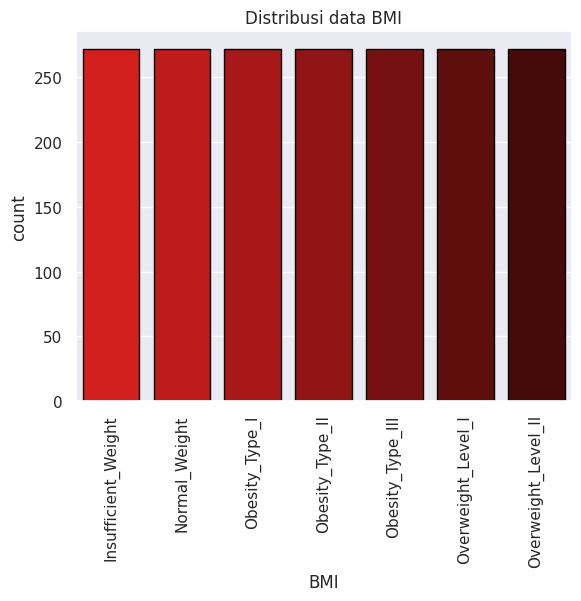

In [32]:
ax = sns.countplot(x = "BMI",data=data_bal, palette="flag",edgecolor="black")
plt.title('Distribusi data BMI')
sns.set(font_scale=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [33]:
data_preprocess = pd.get_dummies(data_bal, columns = good_label_cols)

In [34]:
dic_to_replace = {"BMI": {"Insufficient_Weight": 0, 
                          "Normal_Weight": 1,
                         'Overweight_Level_I': 2,
                          'Overweight_Level_II': 3,
                          'Obesity_Type_I': 4,
                          'Obesity_Type_II': 5,
                          'Obesity_Type_III': 6,}
                         }
data_preprocess.replace(dic_to_replace, inplace=True)

In [35]:
data_preprocess

,Age,Height,Weight,FCVC,CH2O,FAF,TUE,BMI,FHWO_no,FHWO_yes,...,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no
0,21.243142,1.598019,44.845655,3.000000,2.444125,1.318170,0.000000,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,18.000000,1.706530,51.121749,2.000000,2.000000,0.000000,1.329237,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,18.871794,1.586895,41.452385,2.000000,1.000000,0.194745,1.547086,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3,23.000000,1.728834,51.442293,2.000000,1.229915,0.619533,2.000000,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4,18.000000,1.701650,50.157707,1.757466,1.153559,0.833976,1.616045,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,25.632447,1.836943,96.192662,1.317729,2.000000,1.806740,1.939770,3,0,1,...,0,0,1,0,1,0,0,0,1,0
268,28.770852,1.532897,65.031879,2.000000,1.000000,0.262171,0.000000,3,0,1,...,0,0,1,0,1,0,0,0,0,1
269,33.015258,1.731960,84.315608,2.000000,2.205911,1.293396,0.000000,3,0,1,...,0,0,1,0,1,0,0,0,0,1
270,38.464538,1.696423,78.967919,3.000000,2.981604,0.000000,0.000000,3,0,1,...,0,0,1,0,1,0,0,0,0,1


In [36]:
target_name = 'BMI'
labels = data_preprocess[target_name]
features = data_preprocess.drop(target_name, axis=1)

In [37]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

In [38]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=123
)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(train_features,train_labels)

RandomForestClassifier()

In [40]:
train_score = rfc.score(train_features, train_labels)
test_score = rfc.score(test_features, test_labels)

print(f"Classical Random Forest Classifier on the training dataset: {train_score:.2f}")
print(f"Classical Random Forest Classifier on the test dataset: {test_score:.2f}")

Classical Random Forest Classifier on the training dataset: 1.00
Classical Random Forest Classifier on the test dataset: 0.92


In [41]:
from sklearn.metrics import classification_report,confusion_matrix

# Confusion Matrix of Random Forest Classifier
rfc_pred = rfc.predict(test_features)

cm = confusion_matrix(test_labels,rfc_pred)
cm

array([[58,  0,  0,  0,  0,  0,  0],
       [ 1, 44,  1,  2,  0,  0,  0],
       [ 0,  7, 45,  1,  0,  0,  0],
       [ 0,  4,  1, 45,  2,  0,  0],
       [ 0,  5,  0,  4, 34,  1,  0],
       [ 0,  0,  0,  0,  0, 69,  0],
       [ 0,  0,  0,  0,  0,  0, 57]])

<Axes: >

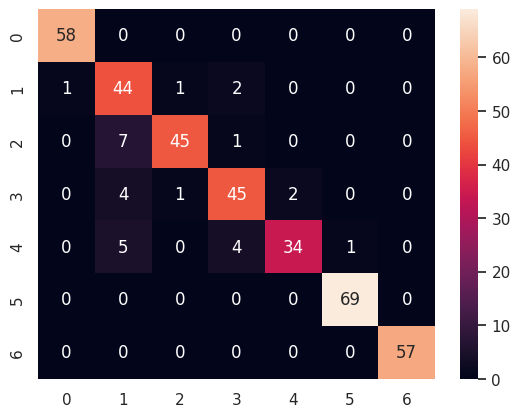

In [42]:
sns.heatmap(confusion_matrix(test_labels,rfc_pred),annot=True,fmt="d")

In [43]:
print('Classification Report of Random Forest Classifier : \n',classification_report(test_labels, rfc_pred, digits=4))

Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0     0.9831    1.0000    0.9915        58
           1     0.7333    0.9167    0.8148        48
           2     0.9574    0.8491    0.9000        53
           3     0.8654    0.8654    0.8654        52
           4     0.9444    0.7727    0.8500        44
           5     0.9857    1.0000    0.9928        69
           6     1.0000    1.0000    1.0000        57

    accuracy                         0.9239       381
   macro avg     0.9242    0.9148    0.9164       381
weighted avg     0.9305    0.9239    0.9245       381



(-1.0, 21.0)

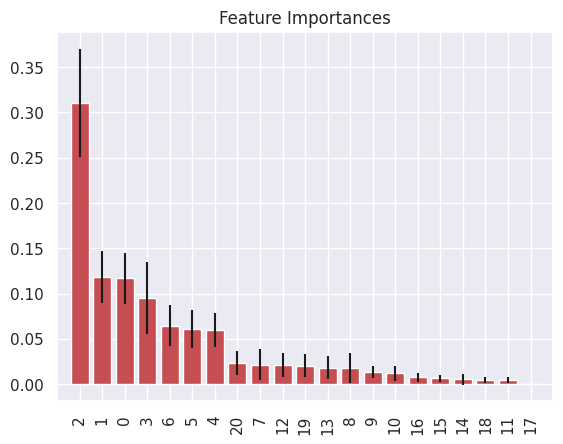

In [44]:
# Menampilkan feature importance
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(features.shape[1]), pd.DataFrame(features).columns[indices], rotation='vertical')
plt.xlim([-1, features.shape[1]])

# logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(train_features, train_labels)

# Make predictions on the test data
predictions = logreg.predict(test_features)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
train_score = logreg.score(train_features, train_labels)
test_score = logreg.score(test_features, test_labels)

print(f"logistic regression on the training dataset: {train_score:.2f}")
print(f"logistic regression on the test dataset: {test_score:.2f}")

logistic regression on the training dataset: 0.73
logistic regression on the test dataset: 0.70


In [47]:
from sklearn.metrics import classification_report,confusion_matrix

# Confusion Matrix of logistic regression
logreg_pred = logreg.predict(test_features)

cm = confusion_matrix(test_labels,logreg_pred)
cm

array([[55,  1,  2,  0,  0,  0,  0],
       [16, 18,  7,  6,  1,  0,  0],
       [ 1, 10, 27,  7,  7,  1,  0],
       [ 0,  2,  9, 25, 14,  2,  0],
       [ 0,  1,  3,  4, 25,  6,  5],
       [ 0,  0,  0,  0,  4, 61,  4],
       [ 0,  0,  0,  0,  0,  0, 57]])

<Axes: >

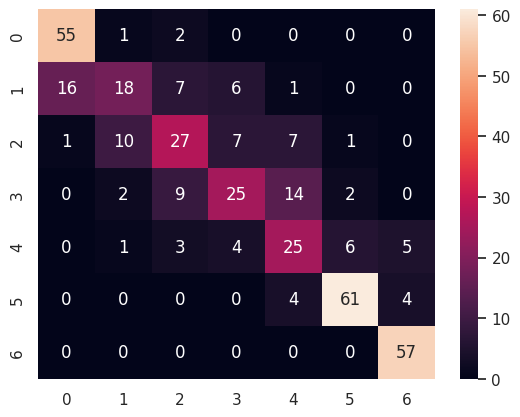

In [48]:
sns.heatmap(confusion_matrix(test_labels,logreg_pred),annot=True,fmt="d")

In [49]:
print('Classification Report of logistic regression : \n',classification_report(test_labels, logreg_pred, digits=4))

Classification Report of logistic regression : 
               precision    recall  f1-score   support

           0     0.7639    0.9483    0.8462        58
           1     0.5625    0.3750    0.4500        48
           2     0.5625    0.5094    0.5347        53
           3     0.5952    0.4808    0.5319        52
           4     0.4902    0.5682    0.5263        44
           5     0.8714    0.8841    0.8777        69
           6     0.8636    1.0000    0.9268        57

    accuracy                         0.7034       381
   macro avg     0.6728    0.6808    0.6705       381
weighted avg     0.6903    0.7034    0.6909       381



# svc

In [50]:
from sklearn.svm import SVC

# Create an instance of the SVC model
svc = SVC()

# Train the model
svc.fit(train_features, train_labels)

# Make predictions on the test data
predictions = svc.predict(test_features)


In [51]:
train_score = svc.score(train_features, train_labels)
test_score = svc.score(test_features, test_labels)

print(f"svc on the training dataset: {train_score:.2f}")
print(f"svc on the test dataset: {test_score:.2f}")

svc on the training dataset: 0.74
svc on the test dataset: 0.72


In [52]:
from sklearn.metrics import classification_report,confusion_matrix

# Confusion Matrix of svc
svc_pred = svc.predict(test_features)

cm = confusion_matrix(test_labels,svc_pred)
cm

array([[44,  5,  9,  0,  0,  0,  0],
       [ 9, 30,  2,  7,  0,  0,  0],
       [ 1, 12, 26,  8,  6,  0,  0],
       [ 1,  4,  9, 29,  9,  0,  0],
       [ 0,  5,  0,  6, 22,  7,  4],
       [ 0,  0,  0,  0,  0, 67,  2],
       [ 0,  0,  0,  0,  0,  0, 57]])

<Axes: >

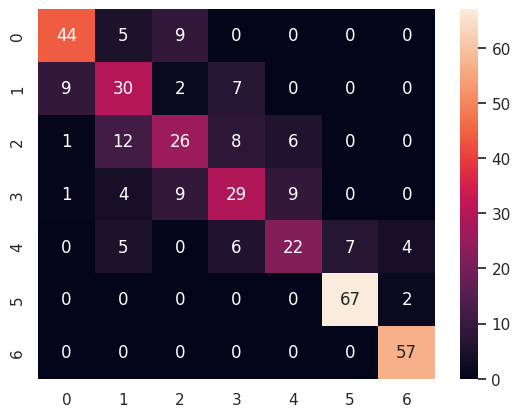

In [53]:
sns.heatmap(confusion_matrix(test_labels,svc_pred),annot=True,fmt="d")

In [54]:
print('Classification Report of svc : \n',classification_report(test_labels, svc_pred, digits=4))

Classification Report of svc : 
               precision    recall  f1-score   support

           0     0.8000    0.7586    0.7788        58
           1     0.5357    0.6250    0.5769        48
           2     0.5652    0.4906    0.5253        53
           3     0.5800    0.5577    0.5686        52
           4     0.5946    0.5000    0.5432        44
           5     0.9054    0.9710    0.9371        69
           6     0.9048    1.0000    0.9500        57

    accuracy                         0.7218       381
   macro avg     0.6980    0.7004    0.6971       381
weighted avg     0.7151    0.7218    0.7165       381



# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(train_features, train_labels)

# Make predictions on the test data
dt_pred = dt.predict(test_features)


In [56]:
train_score = dt.score(train_features, train_labels)
test_score = dt.score(test_features, test_labels)

print(f"decision tree on the training dataset: {train_score:.2f}")
print(f"decision tree on the test dataset: {test_score:.2f}")

decision tree on the training dataset: 1.00
decision tree on the test dataset: 0.92


In [57]:
from sklearn.metrics import classification_report,confusion_matrix

# Confusion Matrix of svc
dt_pred = dt.predict(test_features)

cm = confusion_matrix(test_labels,dt_pred)
cm

array([[58,  0,  0,  0,  0,  0,  0],
       [ 2, 43,  3,  0,  0,  0,  0],
       [ 0,  4, 45,  4,  0,  0,  0],
       [ 0,  0,  4, 43,  4,  1,  0],
       [ 0,  0,  0,  4, 37,  2,  1],
       [ 0,  0,  0,  0,  1, 68,  0],
       [ 0,  0,  0,  0,  0,  0, 57]])

<Axes: >

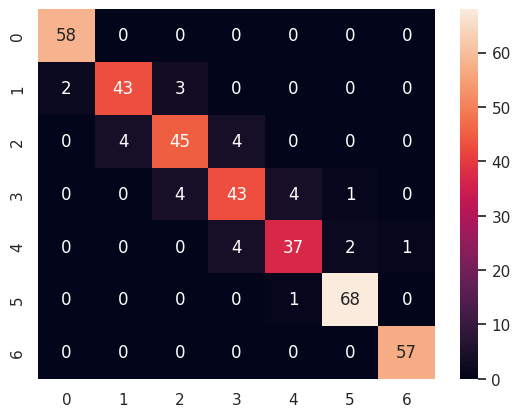

In [58]:
sns.heatmap(confusion_matrix(test_labels,dt_pred),annot=True,fmt="d")

In [59]:
print('Classification Report of decision tree : \n',classification_report(test_labels, dt_pred, digits=4))

Classification Report of decision tree : 
               precision    recall  f1-score   support

           0     0.9667    1.0000    0.9831        58
           1     0.9149    0.8958    0.9053        48
           2     0.8654    0.8491    0.8571        53
           3     0.8431    0.8269    0.8350        52
           4     0.8810    0.8409    0.8605        44
           5     0.9577    0.9855    0.9714        69
           6     0.9828    1.0000    0.9913        57

    accuracy                         0.9213       381
   macro avg     0.9159    0.9140    0.9148       381
weighted avg     0.9201    0.9213    0.9205       381

